<a href="https://colab.research.google.com/github/shiny880410/helloworld/blob/master/final/files/Fuxing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install gspread
!pip install oauth2client
!pip install Pillow
!pip install -U -q PyDrive

In [0]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# choose a local (colab) directory to store the data.
local_download_path = os.path.expanduser('~/data')
try:
  os.makedirs(local_download_path)
except: pass

# 2. Auto-iterate using the query syntax
#    https://developers.google.com/drive/v2/web/search-parameters
file_list = drive.ListFile(
    {'q': "'1_7FyladR7eGnmUjsCvNF1XnpVZpuNGXm' in parents"}).GetList()

for f in file_list:
  # 3. Create & download by id.
  print('title: %s, id: %s' % (f['title'], f['id']))
  #fname = os.path.join(local_download_path, f['title'])
  fname = os.path.join('/content', f['title'])
  print('downloading to {}'.format(fname))
  f_ = drive.CreateFile({'id': f['id']})
  #f_.GetContentFile(fname)
!ls "/root/data"

title: downloadcsv.ipynb, id: 1NQ4WSMFcQWZ8BlAJJUEcYPd-sV7XA_Gk
downloading to /content/downloadcsv.ipynb
title:  Fuxing.ipynb, id: 17FxY-DAhAmgKXOKoxX7jJjl1UAF3MhbQ
downloading to /content/ Fuxing.ipynb
title: trainingdata, id: 1_L_CG5WhF5oZUvpmJTWEbEmHHGJ1-boQ9oxyfILFJyU
downloading to /content/trainingdata
title: datascience final, id: 1ACNaFULWc7k1iO9GCjpcKbu3RB0O81z2xHdDfjymZeM
downloading to /content/datascience final
title: 107年-臺北市A1及A2類交通事故明細, id: 1A3V6ncj7VLNDiDkchaYPIYmqrA0trkEj8L-tHoaAyZs
downloading to /content/107年-臺北市A1及A2類交通事故明細
title:  ShiMin.ipynb, id: 1aiv-l-1jkt8OQarS2n5SU7XgHiKWsPu-
downloading to /content/ ShiMin.ipynb
title: 散佈圖.ipynb, id: 1vogAJX-P6nbf0C0ZfdcE1IY9jC3ZsBuq
downloading to /content/散佈圖.ipynb
title: opendata107road, id: 1VQThSyW7opRf1IxE4NqHl6DTdeClIc-57CeQ4WjzuVI
downloading to /content/opendata107road
title: opendata107road.csv, id: 1YZdDo5vo3eJVSei9ugpmLkcHhJT02C36
downloading to /content/opendata107road.csv
title: PCA2.ipynb, id: 1X2CsY7FaXplAqL

In [0]:
import gspread
from oauth2client.service_account import ServiceAccountCredentials
from oauth2client.client import GoogleCredentials
from google.colab import auth
from google.colab import files
auth.authenticate_user()
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
from IPython.display import Image
from wordcloud import WordCloud, ImageColorGenerator
import re
import jieba
import time
import pandas as pd
import math
from collections import Counter
import codecs
from sklearn.decomposition import PCA
from mlxtend.preprocessing import TransactionEncoder
from gspread_dataframe import get_as_dataframe, set_with_dataframe

gc = gspread.authorize(GoogleCredentials.get_application_default())
sh = gc.open_by_url('https://docs.google.com/spreadsheets/d/1A3V6ncj7VLNDiDkchaYPIYmqrA0trkEj8L-tHoaAyZs/edit#gid=154609684')
wks4 = sh.worksheet("A2-2")
wks3 = sh.worksheet("對照表")

df = get_as_dataframe(wks4,parse_dates=True,usecols=[1,2],header=None)
df.head()

,1,2
0,死亡,死亡死亡中山區民權東路3段與復興北路口普通重型機車行人男性男性至學耄耋晴天50Km/hr四岔...
1,死亡,死亡死亡大安區忠孝東路3段與復興南路1段口自用小客車普通重型機車男性男性知天命至學陰天50K...
2,死亡,死亡死亡死亡北投區復興三路與復興四路口口自用小客車自用小客車自用小客車女性男性男性知天命不惑...
3,受傷,受傷受傷受傷中山區八德路2段與復興北路口普通重型機車普通重型機車乘客男性女性女性至學不惑至學...
4,受傷,受傷受傷中山區復興北路與遼寧街185巷口自用小客車普通重型機車男性男性知天命不惑陰天0四岔路...


In [0]:
label = get_as_dataframe(wks3,parse_dates=True,usecols=[5,6],header=None)
label[:69]

,5,6
0,受傷,Hurt
1,死亡,Die
2,公營公車,Public Bus
3,民營公車,Private Bus
4,公營客運,Public Passenger Bus
5,民營客運,Private Passenger Bus
6,遊覽車,Tour Bus
7,自用大客車,Personal Bus
8,營業用大貨車,Company Large Truck
9,自用大貨車,Personal Large Truck


In [0]:
matrix = []
df1 = df[3:446]
label1 = label[:69]
#print(len(df1))
for i in range(len(label1)):
  matrix.append([])
  for j in range(len(label1)):
    ct = 0 
    for k in df1[2]:
      if(label1[5][i] in k)  & (label1[5][j] in k ):
        ct+=1
    matrix[i].append(ct)    
matrix = pd.DataFrame(matrix)

matrix.columns = label1[5]
matrix.index = label1[5]
pd.set_option('display.max_columns', 69)
pd.set_option('display.max_rows', 69)
matrix.head(69)

5,受傷,死亡,公營公車,民營公車,公營客運,民營客運,遊覽車,自用大客車,營業用大貨車,自用大貨車,營業用半聯結車,營業用曳引車,計程車,租賃車,自用小客車,營業用小貨車,自用小貨車,大型重型機車1(550C.C.以上),大型重型機車2(250-550C.C.),普通重型機車,腳踏自行車,行人,乘客,男性,女性,暴雨,雨天,陰天,晴天,三岔路,四岔路,多岔路,隧道,地下道,橋樑,涵洞,高架道路,彎曲路及附近,坡路,巷弄,直路,圓環,廣場,交叉路口內,交叉口附近,機車待轉區,機車停等區,交通島,迴轉道,快車道,慢車道,一般車道,公車專用道,機車專用道,機車優先道,路肩、路緣,行人穿越道,穿越道附近,人行道,至學,而立,不惑,知天命,耳順,耄耋,古稀,50Km/hr,40Km/hr,30Km/hr
5,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
受傷,443,0,0,5,0,1,1,0,2,2,0,0,97,30,166,1,25,3,2,358,27,41,51,410,232,2,85,63,293,43,230,7,0,9,0,0,1,3,0,2,146,0,0,193,82,3,2,0,0,6,11,134,0,1,0,0,6,0,3,284,133,137,151,93,8,19,337,71,51
死亡,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
公營公車,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
民營公車,5,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2,5,3,0,1,0,4,0,2,0,0,0,0,0,0,0,0,0,3,0,0,1,1,0,0,0,0,0,1,2,0,0,0,0,0,0,0,1,3,2,2,0,0,1,5,0,0
公營客運,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
民營客運,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
遊覽車,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
自用大客車,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
營業用大貨車,2,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0,1,0,1,0,2,2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,2,1,2,0,0,0,0,1,0,1


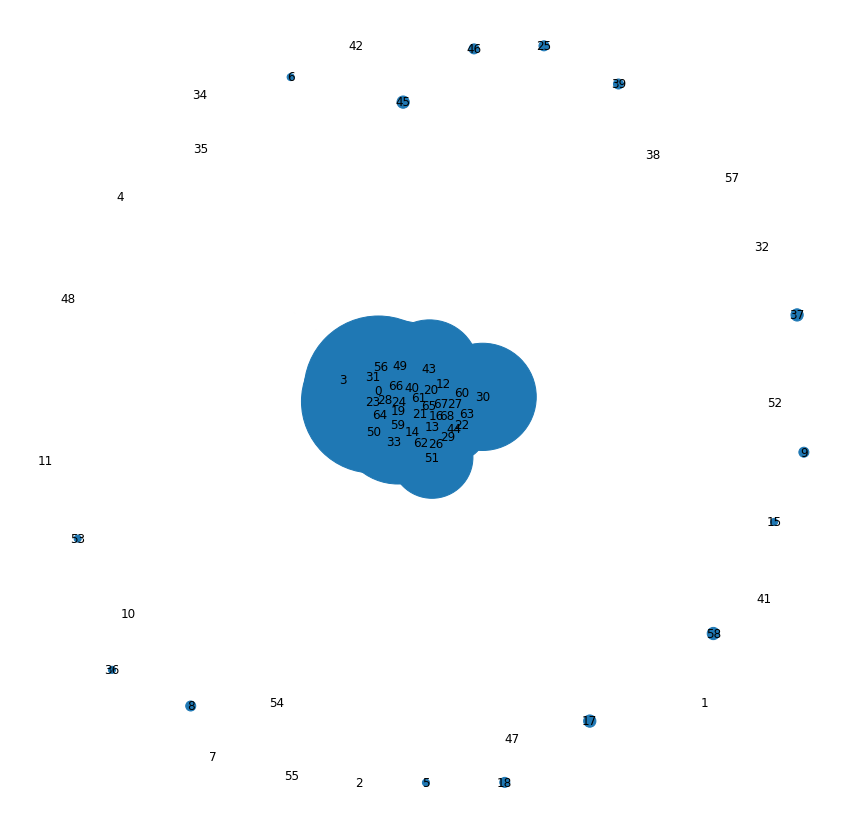

In [0]:
import networkx as nx
import matplotlib.font_manager as fm
import matplotlib
plt.subplots(figsize=(15,15))
G = nx.DiGraph()
G.add_nodes_from(range(len(label1[5])))
widths = [] 
sizes = []
for i in range(len(label1[5])):
  for j in range(len(label1[5])):
    w = matrix[label1[5][i]][label1[5][j]]
    if i==j:
      sizes.append(w*50)
      continue
    if w<=3:
      continue
    widths.append(w/10)
    #if w==0:
    #  w=0.1
    #print(type(w))
    
    G.add_edges_from([(i,j)], weight=1/w)
nx.draw(G,with_labels=True,width=widths,node_size = sizes)

In [0]:
label2=label.drop([42,45,46,25,39,38,57,32,37,52,9,15,41,58,1,17,47,18,5,2,55,7,54,8,36,10,53,11,48,4,35,6,34])
label2=label2[:36]
label2.head(36)

,5,6
0,受傷,Hurt
3,民營公車,Private Bus
12,計程車,Taxi
13,租賃車,Rental Car
14,自用小客車,Personal Passenger Car
16,自用小貨車,Personal Small Truck
19,普通重型機車,Motocycle
20,腳踏自行車,Bike
21,行人,Pedestrian
22,乘客,Passenger


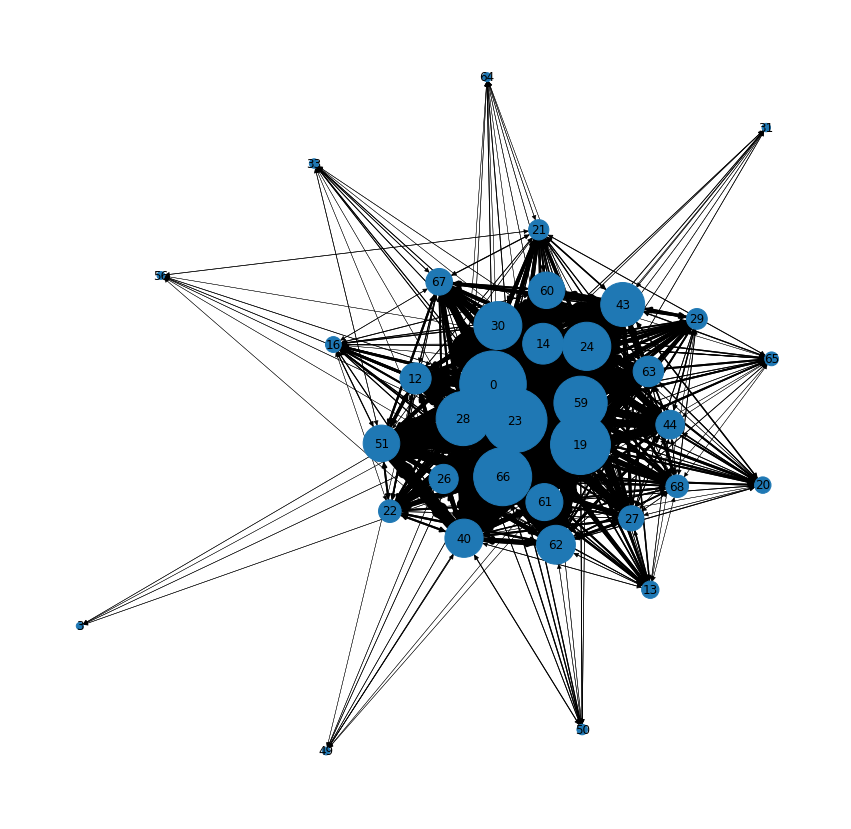

In [0]:
import networkx as nx
import matplotlib.font_manager as fm
import matplotlib
plt.subplots(figsize=(15,15))
G = nx.DiGraph()
G.add_nodes_from(label2.index.tolist())

widths = [] 
sizes = []
for i in label2.index.tolist():
  for j in label2.index.tolist():
    w = matrix[label2[5][i]][label2[5][j]]
    if i==j:
      sizes.append(w*10)
      continue
    if w<=3:
      continue
    widths.append(w/10)
    #if w==0:
    #  w=0.1
    #print(type(w))
    
    G.add_edges_from([(i,j)], weight=-math.log(1/w))
nx.draw(G,with_labels=True,width=widths,node_size = sizes)

In [0]:
label3=label2.drop([64,31,50,49,3,56,33,65,20])
label3=label3[:27]
label3.head(27)

,5,6
0,受傷,Hurt
12,計程車,Taxi
13,租賃車,Rental Car
14,自用小客車,Personal Passenger Car
16,自用小貨車,Personal Small Truck
19,普通重型機車,Motocycle
21,行人,Pedestrian
22,乘客,Passenger
23,男性,Male
24,女性,Female


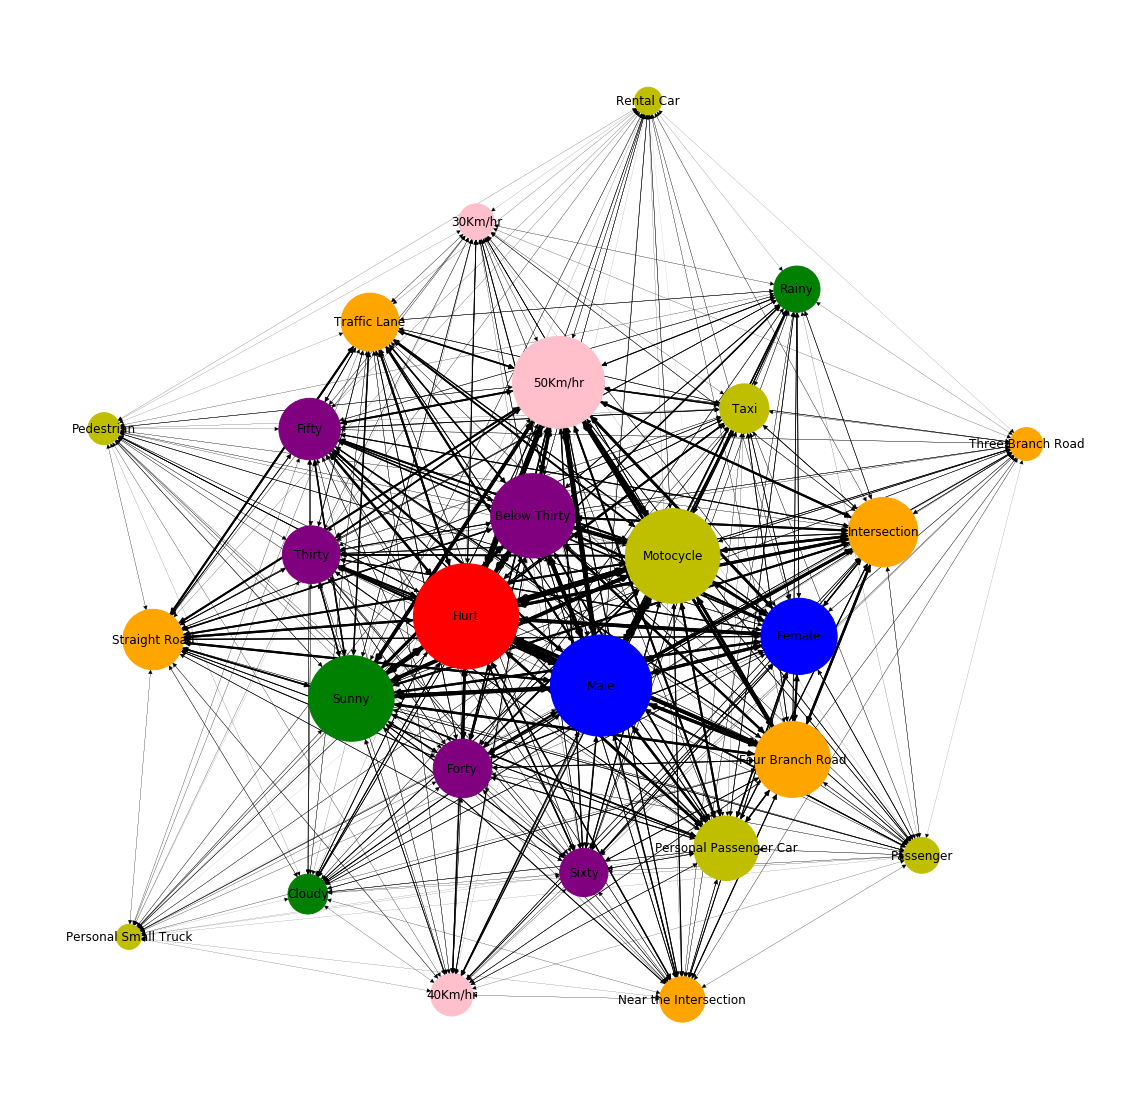

In [0]:
import networkx as nx
import matplotlib.font_manager as fm
import matplotlib
import math
plt.subplots(figsize=(20,20))
G = nx.DiGraph()
#G.add_nodes_from(label2.index.tolist())
G.add_nodes_from(label3[6].tolist())
widths = [] 
sizes = []
for i in label3.index.tolist():
  for j in label3.index.tolist():
    w = matrix[label3[5][i]][label3[5][j]]
    if i==j:
      sizes.append(w*25)
      continue
    if w<=1:
      continue
    widths.append(w/65)    
    #G.add_edges_from([(i,j)], weight=-25*math.log(1/w))
    G.add_edges_from([(label3[6][i],label3[6][j])], weight=-5*math.log(1/w))
pos = nx.spring_layout(G, k=0.5, iterations=20)
colors=['r','y','y','y','y','y','y','y','b','b','g','g','g','orange','orange','orange','orange','orange','orange','purple','purple','purple','purple','purple','pink','pink','pink']

nx.draw(G,pos,with_labels=True,width=widths,node_size = sizes,node_color=colors)